In [1]:
#Description: This program attempts to predict the future price of ETH

import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Load the ETH data
from google.colab import files
files.upload()

Saving ETH_USD (2).csv to ETH_USD (2).csv


{'ETH_USD (2).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n2020-09-02,477.007874,480.330994,424.460022,440.040497,440.040497,19691854014\r\n2020-09-03,440.239990,449.532471,381.129700,385.671936,385.671936,19622845896\r\n2020-09-04,384.671631,402.411743,371.636688,388.241150,388.241150,16747106257\r\n2020-09-05,388.038391,394.172272,316.774353,335.260071,335.260071,29880047640\r\n2020-09-06,335.334564,359.764038,319.041901,353.362274,353.362274,27643678917\r\n2020-09-07,353.450256,358.211884,326.254364,352.673492,352.673492,21763614732\r\n2020-09-08,353.202271,355.562866,328.816772,337.602112,337.602112,17991403432\r\n2020-09-09,337.824921,359.164490,332.165009,351.110016,351.110016,14547933520\r\n2020-09-10,351.429321,377.393585,351.111755,368.101898,368.101898,31421134556\r\n2020-09-11,368.118500,376.630402,355.582581,374.695587,374.695587,27296269329\r\n2020-09-12,374.595398,387.538452,367.842194,387.183105,387.183105,13295405814\r\n2020-09-13,387.519287,388.959808,354.34017

In [3]:
#Read in the data
df = pd.read_csv('ETH_USD (2).csv')
#Set the date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-09-02,2020-09-02,477.007874,480.330994,424.460022,440.040497,440.040497,19691854014
2020-09-03,2020-09-03,440.239990,449.532471,381.129700,385.671936,385.671936,19622845896
2020-09-04,2020-09-04,384.671631,402.411743,371.636688,388.241150,388.241150,16747106257
2020-09-05,2020-09-05,388.038391,394.172272,316.774353,335.260071,335.260071,29880047640
2020-09-06,2020-09-06,335.334564,359.764038,319.041901,353.362274,353.362274,27643678917
...,...,...,...,...,...,...,...
2021-01-12,2021-01-12,1088.526733,1149.240234,1012.764160,1043.434570,1043.434570,37494601692
2021-01-13,2021-01-13,1043.740967,1134.338501,994.549072,1130.739380,1130.739380,30109792795
2021-01-14,2021-01-14,1130.231201,1244.163086,1093.060791,1218.453003,1218.453003,33410915929
2021-01-15,2021-01-15,1221.877197,1250.505859,1090.721069,1171.834595,1171.834595,35972039310


In [4]:
future_days = 5

In [5]:
#Create a new column
df[str(future_days)+ '_Day_Price_Forecast' ] = df[['Close']].shift(-future_days)
#Show the data
df[['Close', str(future_days)+ '_Day_Price_Forecast' ]]

,Close,5_Day_Price_Forecast
2020-09-02,440.040497,352.673492
2020-09-03,385.671936,337.602112
2020-09-04,388.241150,351.110016
2020-09-05,335.260071,368.101898
2020-09-06,353.362274,374.695587
...,...,...
2021-01-12,1043.434570,NaN
2021-01-13,1130.739380,NaN
2021-01-14,1218.453003,NaN
2021-01-15,1171.834595,NaN


In [6]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[ 440.040497]
 [ 385.671936]
 [ 388.24115 ]
 [ 335.260071]
 [ 353.362274]
 [ 352.673492]
 [ 337.602112]
 [ 351.110016]
 [ 368.101898]
 [ 374.695587]
 [ 387.183105]
 [ 365.570007]
 [ 377.26886 ]
 [ 364.839203]
 [ 365.812286]
 [ 389.019226]
 [ 384.364532]
 [ 385.544373]
 [ 371.052826]
 [ 341.786072]
 [ 344.503174]
 [ 320.585541]
 [ 349.356659]
 [ 352.161865]
 [ 354.965271]
 [ 357.321686]
 [ 354.9505  ]
 [ 359.963409]
 [ 360.022369]
 [ 353.231293]
 [ 346.532654]
 [ 347.321594]
 [ 353.121918]
 [ 354.2771  ]
 [ 341.021149]
 [ 342.119781]
 [ 351.455658]
 [ 351.455658]
 [ 370.96759 ]
 [ 375.142059]
 [ 375.142059]
 [ 375.142059]
 [ 379.484039]
 [ 377.441833]
 [ 366.229004]
 [ 368.855927]
 [ 378.213684]
 [ 379.935608]
 [ 369.136902]
 [ 392.189972]
 [ 413.77298 ]
 [ 409.766693]
 [ 412.457611]
 [ 406.217773]
 [ 393.888306]
 [ 403.99704 ]
 [ 388.650757]
 [ 386.730103]
 [ 382.819977]
 [ 386.590332]
 [ 396.358185]
 [ 383.156738]
 [ 387.602173]
 [ 402.141998]
 [ 414.067352]
 [ 454.719299]
 [ 435.713

In [7]:
y = np.array(df[str(future_days)+ '_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[ 352.673492  337.602112  351.110016  368.101898  374.695587  387.183105
  365.570007  377.26886   364.839203  365.812286  389.019226  384.364532
  385.544373  371.052826  341.786072  344.503174  320.585541  349.356659
  352.161865  354.965271  357.321686  354.9505    359.963409  360.022369
  353.231293  346.532654  347.321594  353.121918  354.2771    341.021149
  342.119781  351.455658  351.455658  370.96759   375.142059  375.142059
  375.142059  379.484039  377.441833  366.229004  368.855927  378.213684
  379.935608  369.136902  392.189972  413.77298   409.766693  412.457611
  406.217773  393.888306  403.99704   388.650757  386.730103  382.819977
  386.590332  396.358185  383.156738  387.602173  402.141998  414.067352
  454.719299  435.713135  453.554779  444.163055  449.679626  462.960541
  461.00528   474.626434  460.149841  447.559082  459.940308  480.360077
  479.48407   471.630432  509.744568  549.486633  558.068115  608.454041
  603.897766  570.686646  518.801147  517.493713  5

In [8]:
#Spilt the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [9]:
from sklearn.svm import SVR
svr_rbf= SVR(kernel= 'rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1e-05,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [10]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.9326818980612259


In [11]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 376.90972101  482.29968926  355.76836351  492.25894745  629.08381312
 1226.25447107  364.40913102  599.96208694  353.35995038 1129.87066801
  389.846691    581.46830838  355.31552129  638.73294022  362.44275236
  410.02078982  955.23199431  470.19722722  405.86404997  695.07428514
 1108.12071901  363.10862293  858.00301378  649.1988656   359.20814905
  390.83359989  391.25801644]


In [12]:
print(y_test)

[ 352.161865  603.897766  354.965271  558.068115  559.678528 1262.246704
  353.231293  586.011169  365.570007 1043.43457   337.602112  517.493713
  375.142059  575.758057  360.022369  382.819977 1225.678101  480.360077
  444.163055  634.854187 1171.834595  351.455658  774.534973  731.520142
  351.455658  387.602173  389.019226]


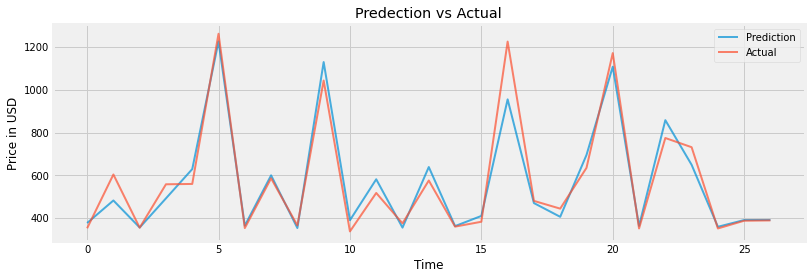

In [15]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Prediction', lw=2, alpha=.7)
plt.plot(y_test, label = 'Actual', lw=2, alpha=.7)
plt.title('Predection vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=0)
plt.show()